In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [5]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [6]:
np.random.seed(42)


In [7]:
# from pathlib import Path
# path = Path("train/")

# print(path)
# for c in data.classes:
#     print(c)
#     verify_images(path/c, delete=True)

In [10]:
test_files=(ImageList.from_folder(path='test-snakes-cropped').split_by_rand_pct(0.).label_from_folder())

In [11]:
test_files

LabelLists;

Train: LabelList (17686 items)
x: ImageList
Image (3, 1730, 777),Image (3, 324, 329),Image (3, 178, 264),Image (3, 1267, 1343),Image (3, 178, 362)
y: CategoryList
test-snakes-cropped,test-snakes-cropped,test-snakes-cropped,test-snakes-cropped,test-snakes-cropped
Path: test-snakes-cropped;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: test-snakes-cropped;

Test: None

In [14]:
verify_images(AICROWD_TEST_IMAGES_PATH ,delete=True)

test-snakes-cropped\00046ff8b04d6fe7f9c5a9d8dca33561.jpg


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'test-snakes-cropped\\00046ff8b04d6fe7f9c5a9d8dca33561.jpg'

In [8]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [9]:
src

LabelLists;

Train: LabelList (65934 items)
x: ImageList
Image (3, 500, 375),Image (3, 500, 375),Image (3, 500, 375),Image (3, 500, 375),Image (3, 375, 500)
y: CategoryList
class-1059,class-1059,class-1059,class-1059,class-1059
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 533, 800),Image (3, 375, 500),Image (3, 2000, 1500),Image (3, 480, 358),Image (3, 500, 375)
y: CategoryList
class-448,class-697,class-204,class-540,class-854
Path: train;

Test: None

In [10]:
data = src.transform(tfms,size=256).databunch(bs=8).normalize(imagenet_stats)

In [11]:
data.c

45

In [12]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')],pretrained=True)


In [ ]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


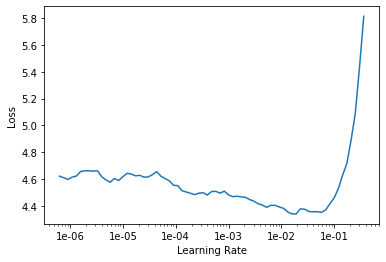

In [14]:
learn.recorder.plot()

In [15]:
lr=1e-3

In [ ]:
learn.fit_one_cycle(5,lr)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time


In [ ]:
learn.save('first_attempt_10e_no_pretrain')

In [ ]:
learn.fit_one_cycle(5,slice(1e-6,lr/10))

In [ ]:
data = src.transform(tfms,size=512).databunch(bs=4).normalize(imagenet_stats)

In [ ]:
learn.data = data

In [ ]:
learn

In [ ]:
learn.fit_one_cycle(2,slice(1e-6,lr/10))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


In [ ]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)


In [ ]:
interp.most_confused(min_val=2)
